# Option Chain Density Analysis Example

This notebook demonstrates the usage of the `OptionChainDensity` class for analyzing option chain density patterns and probability distributions.

In [1]:
import sys
sys.path.append('/Users/jerald/Documents/Dir/Python/Stocks')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from models.densityEstimation.option_chain_density import OptionChainDensity
from bin.main import Manager

## 1. Load and Prepare Data

In [2]:
# Initialize the manager and get option chain data
m = Manager('../../')
option_chain = m.Optionsdb._parse_change_db('qqq')

# Display the first few rows of the data
option_chain.head()

2025-02-08 14:04:06,409 - bin.options.optgd.db_connect - INFO - Options DB Initialized
2025-02-08 14:04:06,410 - bin.options.optgd.db_connect - WARNING - You currently have 8 connections open.
2025-02-08 14:04:06,411 - bin.options.optgd.option_chain - INFO - Option Chain Module Initialized
2025-02-08 14:04:06,412 - root - INFO - PriceDB Initialized 2025-02-08 14:04:06.412415
2025-02-08 14:04:06,412 - root - WARNING - You have 3 open connections.
2025-02-08 14:04:06,491 - bin.alerts.options_alerts - INFO - Notifications instance initialized.


,stock,type,strike,expiry,gatherdate,contractsymbol,stk_price,lastprice,ask,bid,...,volga,theta,rho,lam,speed,zomma,dexp,gexp,vexp,cexp
0,QQQ,Call,350.0,2025-02-07,2025-02-07 10:13:00,QQQ250207C00350000,525.81,178.03,183.53,179.86,...,0.009168,-13.671852,0.006394,2.814652,-0.000002,0.000163,5.010925e+02,1.956084e+02,-7.281280e-01,9.942150e-01
1,QQQ,Call,355.0,2025-02-07,2025-02-07 10:13:00,QQQ250207C00355000,525.81,168.59,178.49,174.87,...,0.009534,-13.600035,0.006479,2.967903,-0.000002,0.000172,5.003588e+02,2.060878e+02,-7.419169e-01,9.927588e-01
2,QQQ,Call,370.0,2025-02-07,2025-02-07 10:13:00,QQQ250207C00370000,525.81,158.19,163.55,159.94,...,0.010694,-13.589988,0.006719,3.145228,-0.000002,0.000202,4.975436e-08,2.437612e-08,-7.891111e-11,9.871716e-11
3,QQQ,Call,400.0,2025-02-07,2025-02-07 10:13:00,QQQ250207C00400000,525.81,126.72,133.55,129.87,...,0.013624,-13.164913,0.007183,3.875303,-0.000003,0.000281,1.242428e+05,8.795372e+04,-2.240016e+02,2.465082e+02
4,QQQ,Call,405.0,2025-02-07,2025-02-07 10:13:00,QQQ250207C00405000,525.81,123.54,128.55,124.86,...,0.014200,-13.083556,0.007256,3.964370,-0.000003,0.000297,4.897583e+03,3.705989e+03,-9.025487e+00,9.717208e+00


## 2. Initialize OptionChainDensity Analyzer

In [3]:
# Create analyzer instance
analyzer = OptionChainDensity(option_chain)

# Basic information about the data
print(f"Number of strikes: {len(analyzer.strikes)}")
print(f"Number of expiry dates: {len(analyzer.expiry_dates)}")
print(f"\nExpiry dates:")
for date in analyzer.expiry_dates:
    print(f"- {date.strftime('%Y-%m-%d')}")

2025-02-08 14:04:08,328 - models.densityEstimation.option_chain_density - INFO - Processing option chain data...


Number of strikes: 374
Number of expiry dates: 25

Expiry dates:
- 2025-02-07
- 2025-02-10
- 2025-02-11
- 2025-02-12
- 2025-02-13
- 2025-02-14
- 2025-02-21
- 2025-02-28
- 2025-03-07
- 2025-03-14
- 2025-03-21
- 2025-03-31
- 2025-04-17
- 2025-06-20
- 2025-06-30
- 2025-08-15
- 2025-09-19
- 2025-09-30
- 2025-12-19
- 2025-12-31
- 2026-01-16
- 2026-06-18
- 2026-09-18
- 2026-12-18
- 2027-01-15


## 3. Distribution Analysis

In [4]:
# Fit probability distributions
distributions = analyzer.fit_distributions()

# Display results
print("Distribution Fitting Results:")
for name, result in distributions.items():
    print(f"\n{name.capitalize()} Distribution:")
    print(f"- Parameters: {result.parameters}")
    print(f"- Goodness of fit (p-value): {result.goodness_of_fit:.4f}")

2025-02-08 14:04:08,377 - models.densityEstimation.option_chain_density - INFO - Fitting probability distributions...
2025-02-08 14:04:08,389 - models.densityEstimation.option_chain_density - INFO - Successfully fitted normal distribution (p-value: 0.0000)
2025-02-08 14:04:08,413 - models.densityEstimation.option_chain_density - INFO - Successfully fitted gamma distribution (p-value: 0.0000)
2025-02-08 14:04:08,415 - models.densityEstimation.option_chain_density - INFO - Successfully fitted lognormal distribution (p-value: 0.0433)


Distribution Fitting Results:

Normal Distribution:
- Parameters: (40024.98930481298, 87354.69881698584)
- Goodness of fit (p-value): 0.0000

Gamma Distribution:
- Parameters: (4.641602424205433e-05, 25.999999999999996, 4.837291183677477)
- Goodness of fit (p-value): 0.0000

Lognormal Distribution:
- Parameters: (1.846085391399882, -43.819724815151126, 10347.364791834969)
- Goodness of fit (p-value): 0.0433


## 4. Kernel Density Estimation

2025-02-08 14:04:08,421 - models.densityEstimation.option_chain_density - INFO - Calculating KDE with bandwidth 0.1...


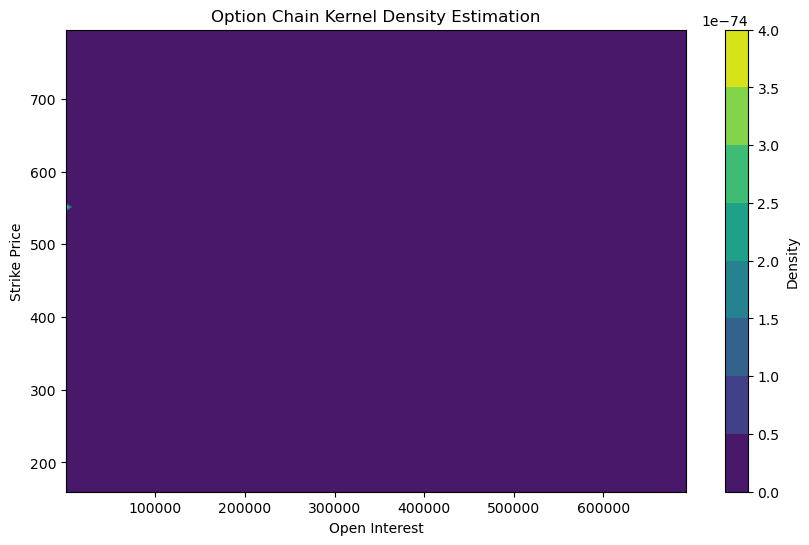

In [5]:
# Calculate KDE
xx, yy, z = analyzer.calculate_kde(bandwidth=0.10)

# Create a standalone KDE plot
plt.figure(figsize=(10, 6))
plt.contourf(yy, xx, z, cmap='viridis')
plt.colorbar(label='Density')
plt.title('Option Chain Kernel Density Estimation')
plt.xlabel('Open Interest')
plt.ylabel('Strike Price')
plt.show()

## 5. Comprehensive Density Analysis

2025-02-08 14:04:08,683 - models.densityEstimation.option_chain_density - INFO - Generating density analysis plot...
2025-02-08 14:04:08,715 - models.densityEstimation.option_chain_density - INFO - Fitting probability distributions...
2025-02-08 14:04:08,718 - models.densityEstimation.option_chain_density - INFO - Successfully fitted normal distribution (p-value: 0.0000)
2025-02-08 14:04:08,754 - models.densityEstimation.option_chain_density - INFO - Successfully fitted gamma distribution (p-value: 0.0000)
2025-02-08 14:04:08,755 - models.densityEstimation.option_chain_density - INFO - Successfully fitted lognormal distribution (p-value: 0.0433)
2025-02-08 14:04:11,490 - models.densityEstimation.option_chain_density - INFO - Calculating KDE with bandwidth 0.8...


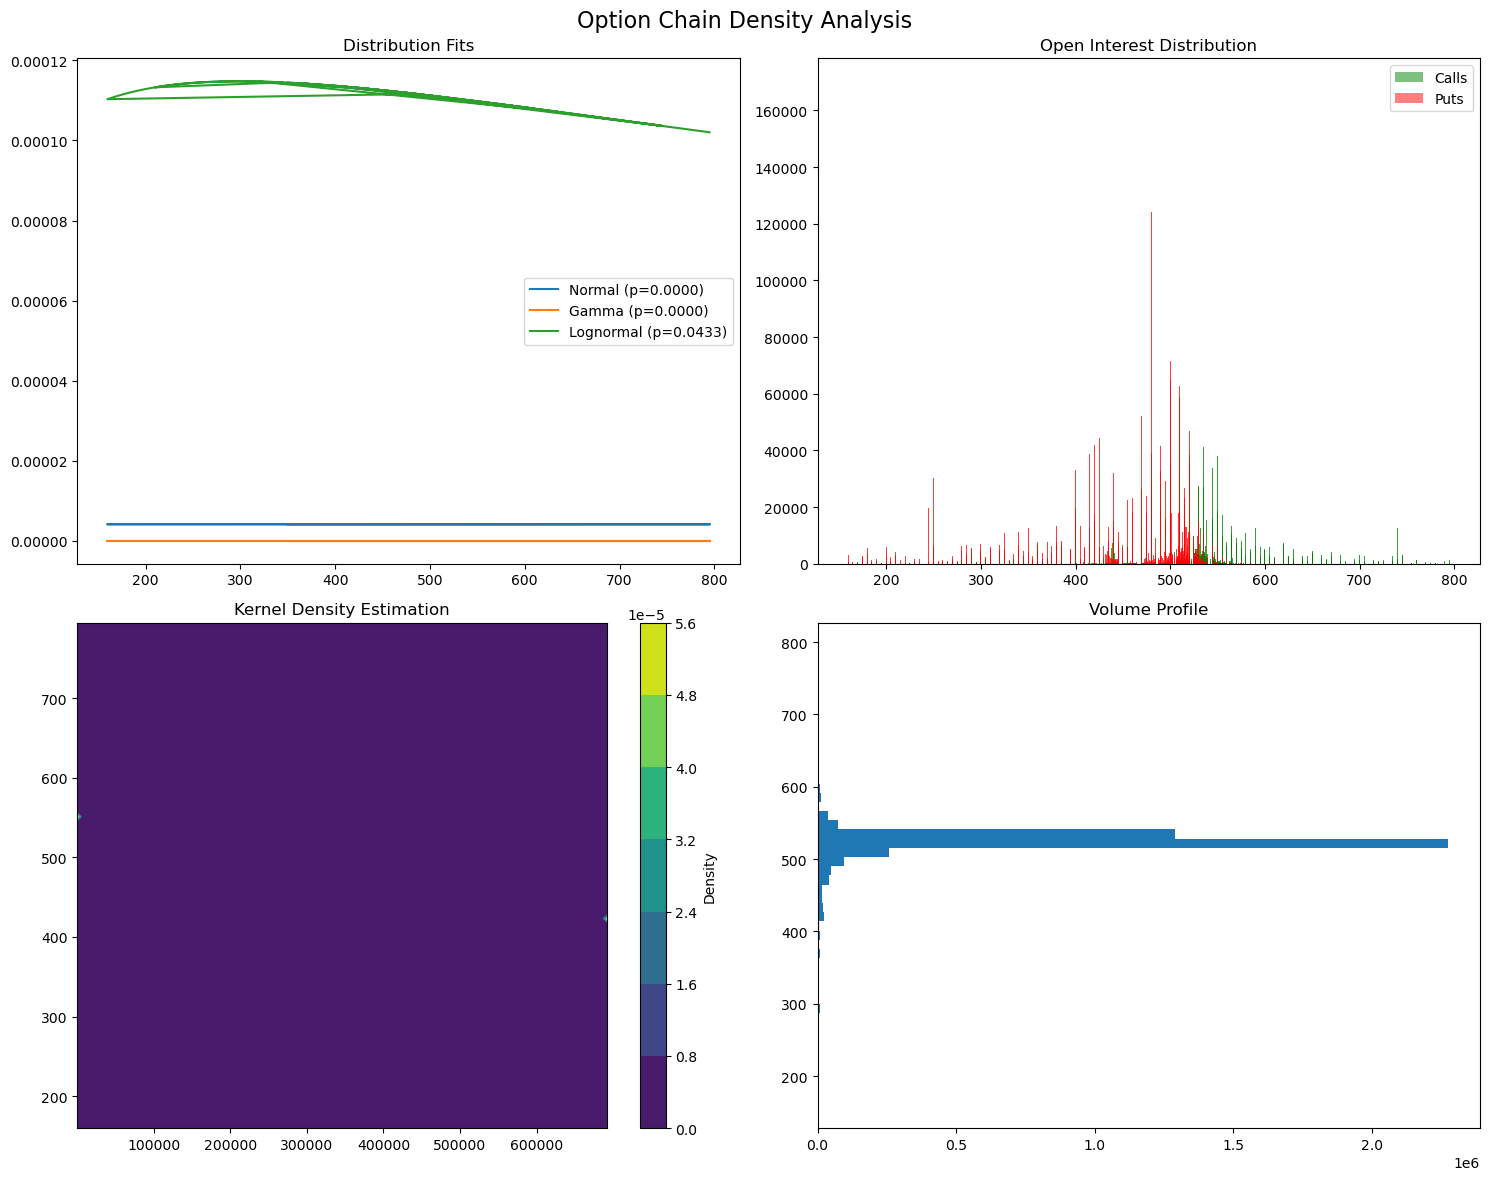

In [6]:
# Generate comprehensive analysis plot
analyzer.plot_density_analysis()

## 6. Strike Price Probability Analysis

In [7]:
# Analyze specific strike prices
current_price = option_chain['strike'].median()  # Use median as approximate current price
test_strikes = [
    current_price * 0.95,  # 5% below current
    current_price,         # At current
    current_price * 1.05   # 5% above current
]

# Calculate probabilities using different methods
methods = ['kde', 'normal', 'gamma', 'lognormal']
results = pd.DataFrame(index=[f"${strike:.2f}" for strike in test_strikes], columns=methods)

for strike in test_strikes:
    for method in methods:
        try:
            prob = analyzer.get_strike_probability(strike, method)
            results.loc[f"${strike:.2f}", method] = prob
        except Exception as e:
            results.loc[f"${strike:.2f}", method] = f"Error: {str(e)}"

# Display results
print("Probability Density by Strike Price and Method:")
display(results.style.background_gradient(cmap='YlOrRd', axis=0))

2025-02-08 14:04:15,897 - models.densityEstimation.option_chain_density - INFO - Calculating probability for strike 470.25 using kde
2025-02-08 14:04:15,906 - models.densityEstimation.option_chain_density - INFO - Calculating probability for strike 470.25 using normal
2025-02-08 14:04:15,907 - models.densityEstimation.option_chain_density - INFO - Fitting probability distributions...
2025-02-08 14:04:15,908 - models.densityEstimation.option_chain_density - INFO - Successfully fitted normal distribution (p-value: 0.0000)
2025-02-08 14:04:15,941 - models.densityEstimation.option_chain_density - INFO - Successfully fitted gamma distribution (p-value: 0.0000)
2025-02-08 14:04:15,945 - models.densityEstimation.option_chain_density - INFO - Successfully fitted lognormal distribution (p-value: 0.0433)
2025-02-08 14:04:15,946 - models.densityEstimation.option_chain_density - INFO - Calculating probability for strike 470.25 using gamma
2025-02-08 14:04:15,947 - models.densityEstimation.option_c

Probability Density by Strike Price and Method:


,kde,normal,gamma,lognormal
$470.25,0.003796,0.000004,0.000000,0.000112
$495.00,0.003968,0.000004,0.000000,0.000111
$519.75,0.004035,0.000004,0.000000,0.000111


## Conclusion

The above analysis demonstrates the different approaches to estimating option chain density:

1. **Distribution Fitting**: Multiple probability distributions are fitted to understand the underlying patterns in the data
2. **Kernel Density Estimation**: Non-parametric approach that provides a flexible way to estimate the probability density
3. **Strike Price Analysis**: Specific probability calculations for strikes of interest

This information can be valuable for:
- Understanding market expectations
- Identifying areas of high option activity
- Assessing the probability of price movements

In [27]:
oc = option_chain[option_chain.gatherdate == option_chain.gatherdate.max()].copy()
oc = oc[(oc.strike / oc.stk_price).between(0.95, 1.05)]

oc = oc[['strike', 'lastprice']].reset_index(drop=True)
curve = analyzer.get_price_curvature(oc)

In [29]:
curve.dropna()

,strike,lastprice,curvature
1,498.0,28.28,-6.96
2,499.0,21.31,8.99
3,500.0,23.33,-0.27
4,501.0,25.08,-4.13
5,502.0,22.70,3.17
...,...,...,...
1459,520.0,44.98,-0.37
1460,525.0,46.61,0.27
1461,530.0,48.51,-1.95
1462,535.0,48.46,6.78
